<a href="https://colab.research.google.com/github/naoya1110/electrical_circuit_lecture_materials/blob/main/8%E7%AB%A0_%E4%BA%A4%E6%B5%81%E3%81%AE%E9%9B%BB%E5%8A%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize_matplotlib

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 瞬時電力

交流回路の瞬時電圧$v(t)$および瞬時電流$i(t)$はそれぞれ次の式で与えられる。

$v(t)=V_\mathrm{m}\sin(\omega t + \theta)$

$i(t)=I_\mathrm{m}\sin(\omega t + \phi)$

ここで$v(t)$と$i(t)$の各パラメータに具体的な値を入れ$p(t)$と合わせて可視化してみる。

In [82]:
## 共通
T = 1    # 周期 [s]
f = 1/T    # 周波数 [rad/s]
omega = 2*np.pi*f    # 角周波数 [rad/s]
t = np.linspace(0, 2*T, 10000)    # 時刻

In [109]:
## 電圧
Vm = 2    # 電圧の振幅 [V]
theta = 0    # 電圧の初期位相 [rad]
vt = Vm*np.sin(omega*t + theta)    # 瞬時電圧 [V]

In [120]:
## 電流
Im = 3    # 電流の振幅 [A]
phi = -np.pi/6    # 電流の初期位相 [rad]
it = Im*np.sin(omega*t + phi)    # 瞬時電流 [A]

In [121]:
## 電力
pt = vt*it

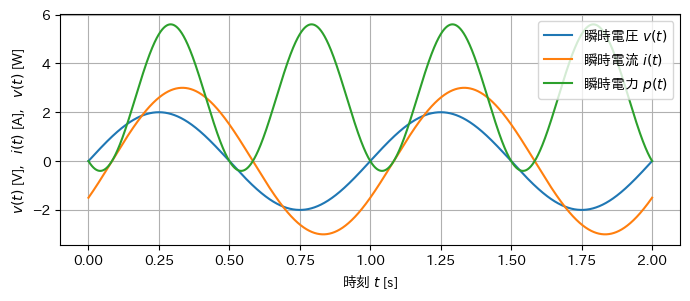

In [122]:
plt.figure(figsize=(8, 3))

plt.plot(t, vt, label="瞬時電圧 $v(t)$")
plt.plot(t, it, label="瞬時電流 $i(t)$")
plt.plot(t, pt, label="瞬時電力 $p(t)$")

plt.xlabel("時刻 $t$ [s]")
plt.ylabel("$v(t)$ [V],   $i(t)$ [A],   $v(t)$ [W] ")
plt.grid()
plt.legend(loc=1)

# 消費電力（有効電力）

瞬時電力$p(t)$を1周期にわたり平均したものが消費電力$P$であり，有効電力とも呼ばれる。

$\displaystyle P = \frac{1}{T}\int_0^T p(t)dt = \frac{1}{T}\int_0^T v(t)i(t)dt$

$P$を求めるためには積分を行う必要があり，手計算は少し大変である。

一方，プログラムでは以下のように簡単に求めることができる。（実際には2周期分を平均しているが結果は同じ。）

In [123]:
P = np.mean(pt)
print(f"P = {P:.3f} [W]")

P = 2.598 [W]


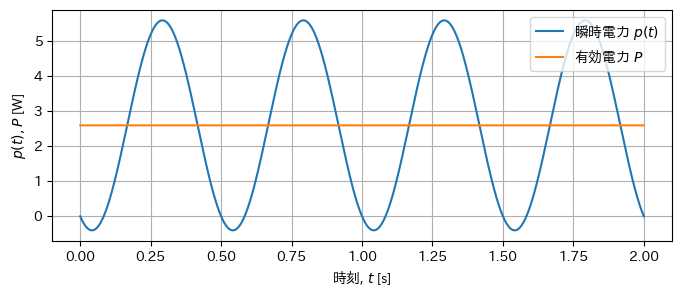

In [124]:
plt.figure(figsize=(8, 3))

plt.plot(t, pt, label="瞬時電力 $p(t)$")
plt.plot(t, P*np.ones(t.shape[0]), label="有効電力 $P$")

plt.xlabel("時刻, $t$ [s]")
plt.ylabel("$p(t), P$ [W]")
plt.grid()
plt.legend(loc=1)

# 複素電力

$v(t)$および$i(t)$を複素電圧$\boldsymbol{V}$および複素電圧$\boldsymbol{I}$に変換すると次のようになる。

$\displaystyle \boldsymbol {V}=\frac{V_\mathrm{m}}{\sqrt{2}}e^{j\theta}=Ve^{j\theta}$

$\displaystyle \boldsymbol {I}=\frac{I_\mathrm{m}}{\sqrt{2}}e^{j\phi}=Ie^{j\phi}$

ここで$V$および$I$はそれぞれ$v(t)$および$i(t)$の実効値である。

In [125]:
# 電圧の実効値
V = Vm/np.sqrt(2)
print(f"V = {V:.3f} [V]")

# 電流の実効値
I = Im/np.sqrt(2)
print(f"I = {I:.3f} [A]")

V = 1.414 [V]
I = 2.121 [A]


複素電力$\boldsymbol{P}$は次の式で定義される。

$\displaystyle \boldsymbol{P}=\boldsymbol{V}\bar{\boldsymbol{I}}=Ve^{j\theta}Ie^{-j\phi}=VIe^{j(\theta-\phi)}\\
=VI\{\cos(\theta-\phi)+j\sin(\theta-\phi)\}\\
=P+jP_r$

ここで$P$は有効電力，$P_r$は無効電力である。

プログラムで実効値$V$および$I$から$P$と$P_r$を計算すると次のようになる。

In [126]:
# 有効電力
P = V*I*np.cos(theta-phi)
print(f"P = {P:.3f} [W]")

# 無効電力
Pr = V*I*np.sin(theta-phi)
print(f"Pr = {Pr:.3f} [var]")

P = 2.598 [W]
Pr = 1.500 [var]


瞬時値$p(t)$から求めた有効電力$P$と複素電圧$\boldsymbol{P}$から求めた有効電力$P$が一致していることが分かる。

また皮相電力$P_a$および力率(Power Factor)は次のように定義される。

$\displaystyle P_a = |\boldsymbol{P}|=|VIe^{j(\theta-\phi)}|=VI$

$\displaystyle Power Factor = \frac{P}{P_a} = \frac{VI\cos(\theta-\phi)}{VI}=\cos(\theta-\phi)$

In [127]:
# 皮相電力
Pa = V*I
print(f"Pa = {Pa:.3f} [VA]")

# 力率
powerfactor = P/Pa
print(f"Power Factor = {powerfactor:.3f}")

Pa = 3.000 [VA]
Power Factor = 0.866
